# Phase  3  project - Machine Learning!

Name:  Winfred Kinya Bundi.


Student pace:  Full time Hybrid.


Scheduled project review date/time: 07/06/2024.


Instructor name: Mwikali Maryanne.


Blog post URL: git@github.com:winnycodegurl/MachineLearningprojectphase3.git



# INTRODUCTION.

Telecommunication companies face significant challenges in reducing customer churn, which can lead to substantial revenue losses. Customer churn occurs when customers discontinue their services, and understanding the factors that contribute to this behavior is crucial for maintaining profitability and growth. This project aims to analyze customer data to identify predictable patterns in customer churn. By developing predictive models and segmenting customers based on their behavior, the goal is to provide actionable insights that optimize service quality, enhance customer satisfaction, and improve operational efficiency. These insights will help telecom companies make strategic decisions to drive performance improvements and foster customer loyalty.








# BUSINESS UNDERSTANDING
Understanding the factors that contribute to churn can help telecommunication  companies stakeholders'  devise strategies to retain customers and reduce revenue loss.The primary stakeholders are the company's executive team, customer service managers, and operations management. Secondary stakeholders include marketing and product development teams interested in enhancing customer satisfaction and loyalty.Key study factors include:

1.Account Length: Understanding the duration of customer accounts can help identify patterns where customers are more likely to churn. For example, if churn is more prevalent among newer customers, the company might need to improve onboarding processes or initial customer support.

2.Usage Patterns: Analyzing total day, evening, and night minutes can reveal insights into how customer usage correlates with churn. Customers with low usage might be dissatisfied with service quality or pricing and could be more prone to churn. Tailoring services or offering usage-based incentives might help retain these customers.

3.Service Plans: The presence of international and voicemail plans can provide insights into customer preferences and needs. Customers with specific service plans might have different churn behaviors. For example, those without international plans might churn if they find better offers elsewhere. Understanding these patterns can help in customizing service plans to better meet customer needs.

4.Customer Interactions: Customer service calls are a critical indicator of customer satisfaction. A high number of customer service interactions might indicate unresolved issues or dissatisfaction, leading to churn. By analyzing the nature and frequency of these calls, companies can identify common problems and address them proactively.


Telecommunications companies can develop targeted interventions to improve customer retention. Proactive measures might include personalized communication, tailored service plans, better customer support, and special incentives for at-risk customers

# PROBLEM STATEMENT.

Lecom Limited, a medium-sized telecommunication company, strives to become the top-performing company in its state.This project aims to analyze Lecom Limited's customer data to identify predictable patterns in customer churn. By developing predictive models and segmenting customers based on their behavior, we will provide actionable insights to optimize service quality, enhance customer satisfaction, and improve operational efficiency. The ultimate objective is to help Lecom Limited make strategic decisions that drive performance improvements and foster customer loyalty.


# OBJECTIVES.
1.Identify the key indicators of customer churn using the given data.

2.Analyze the factors leading to frequent customer service calls and provide recommendations to reduce call volumes and improve service efficiency.

3.Segment customers based on their service usage patterns, satisfaction levels, and likelihood of churn to target specific interventions.

4.Develop predictive models to forecast customer churn, frequent customer service calls, and overall customer satisfaction.Evaluate the models to check on the best performing model using variious metrics such as accuary,ROC and AUC curves.

5.Provide Actionable Recommendations to business stakeholders.


# DATA UNDERSTANDING
The dataset consists of telecommunications customer data across various attributes:

state: The state where the customer is located.

account length: The duration (in days) that the customer has been with the service.

area code: The area code of the customer's phone number.

phone number: The customer's phone number.

international plan: Whether the customer has an international calling plan (yes/no).

voice mail plan: Whether the customer has a voice mail plan (yes/no).

number vmail messages: The number of voice mail messages the customer has.

total day minutes: The total number of minutes the customer has used during the day.

total day calls: The total number of calls the customer has made during the day.

total day charge: The total charge for the day minutes.

total eve minutes: The total number of minutes the customer has used in the evening.

total eve calls: The total number of calls the customer has made in the evening.

total eve charge: The total charge for the evening minutes.

total night minutes: The total number of minutes the customer has used at night.

total night calls: The total number of calls the customer has made at night.

total night charge: The total charge for the night minutes.

total intl minutes: The total number of international minutes the customer has used.

total intl calls: The total number of international calls the customer has made.

total intl charge: The total charge for the international minutes.

customer service calls: The number of calls the customer has made to customer service.

churn: Whether the customer has churned (TRUE/FALSE).

TABLE OF CONTENTS


1.Data Preparation

2.Data cleaning

3.Exploratory data analysis

4.Statistical Analysis

5.Modelling

6.Evaluation

7.Conclusion

8.Reccomendations

# 1. DATA PREPARATION

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import (VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, 
    RFE, RFECV)
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from math import log2
from sklearn.pipeline import Pipeline
from pandas.api.types import is_numeric_dtype






In [46]:
# Load the dataset to inspect the initial state of the data
import pandas as pd

class churmdata:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
    
    def load_data(self):
        self.data = pd.read_csv(self.file_path)
    
    def display_info(self):
        self.data.info()

    
    def display_head(self,n=5):
        self.data.head
        print(self.data.head(n))
    

    def display_statistics(self):
        self.data.describe()
        print(self.data.describe())

    def check_missing_data(self):
        
        if self.data is not None:
            print("Missing Data Check:")
            missing_data = self.data.isnull().sum()
            print(missing_data[missing_data > 0])
        else:
            print("No missing data") 

    def check_duplicates(self):
        
        if self.data is not None:
            print("Duplicate Rows Check:")
            duplicates = self.data.duplicated().sum()
            print(f"Number of duplicate rows: {duplicates}")
        else:
            print("No duplicate rows")
             
    def display_statistics(self, summary_columns):
        """Displays statistics of the specified columns in the dataset."""
        if self.data is not None:
            if all(column in self.data.columns for column in summary_columns):
                print("Statistical Summary for specified columns:")
                print(self.data[summary_columns].describe())
            else:
                missing_columns = [column for column in summary_columns if column not in self.data.columns]
                print(f"The following columns are not in the dataset: {missing_columns}")
        else:
            print("Data not loaded. Please load the data first using the 'load_data' method.")          

summary_columns = ['account length','number vmail messages ','total day minutes ','total day calls ','total day charge','total eve minutes ','total eve calls','total eve charge','total night minutes','total night calls','total night charge','total intl minutes ','total intl calls','total intl charge','customer service calls']            

file_path = 'Churmdata.csv'
churm_data = churmdata(file_path)

churm_data.load_data()


In [42]:
churm_data.display_info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [43]:

churm_data.display_head()

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

In [44]:
#checking for missing data and duplicate
churm_data.check_missing_data()

Missing Data Check:
Series([], dtype: int64)


In [45]:

churm_data.check_duplicates()

Duplicate Rows Check:
Number of duplicate rows: 0


In [58]:
churm_data.display_statistics()         

       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

# Explanatory Data Analysis
   1. Univariate.

In [59]:
class UnivariateAnalysis:
    def __init__(self, churm_data):
        self.data = churm_data
    
    def plot_histograms(self, columns):
        """Plots histograms for the specified columns."""
        self.data[columns].hist(bins=15, figsize=(15, 10), layout=(5, 3))
        plt.tight_layout()
        plt.show()
    
    def plot_boxplots(self, columns):
        """Plots boxplots for the specified columns."""
        plt.figure(figsize=(15, 10))
        for i, column in enumerate(columns, 1):
            plt.subplot(5, 3, i)
            sns.boxplot(y=self.data[column])
            plt.title(column)
        plt.tight_layout()
        plt.show()
    
    def plot_barplots(self, columns):
        """Plots bar plots for the specified categorical columns."""
        plt.figure(figsize=(15, 10))
        for i, column in enumerate(columns, 1):
            plt.subplot(5, 3, i)
            sns.countplot(x=self.data[column])
            plt.title(column)
        plt.tight_layout()
        plt.show()





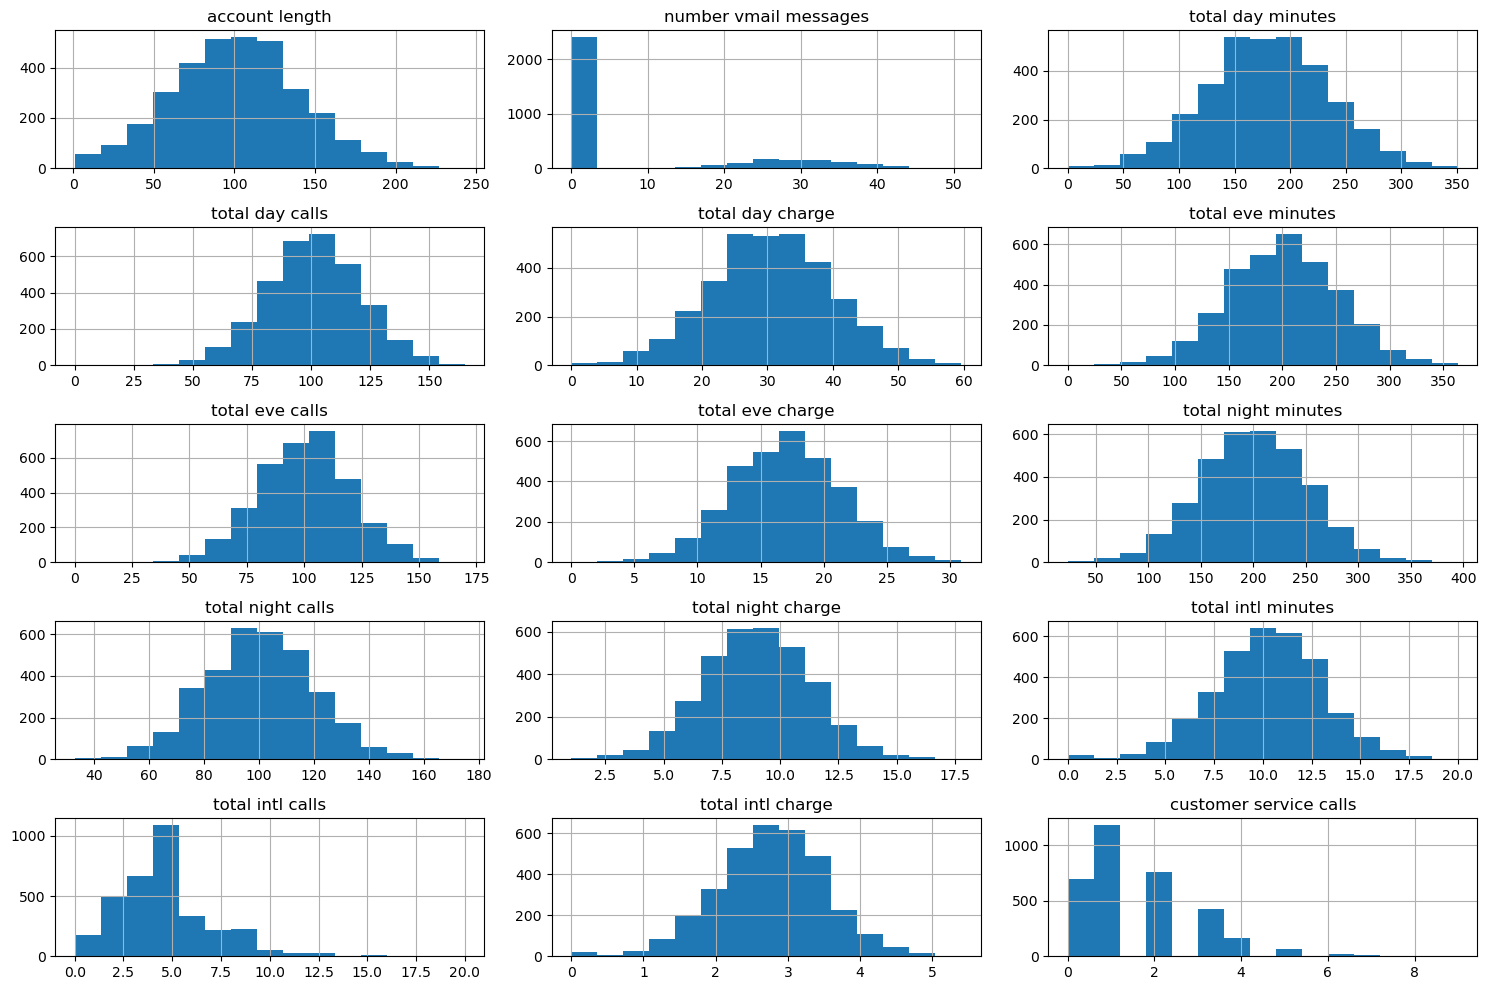

In [64]:
univariate_analysis = UnivariateAnalysis(churm_data.data)
numerical_columns =[
    'account length','number vmail messages','total day minutes','total day calls',
    'total day charge','total eve minutes','total eve calls','total eve charge',
    'total night minutes','total night calls','total night charge','total intl minutes',
    'total intl calls','total intl charge','customer service calls'
]

univariate_analysis.plot_histograms(numerical_columns)


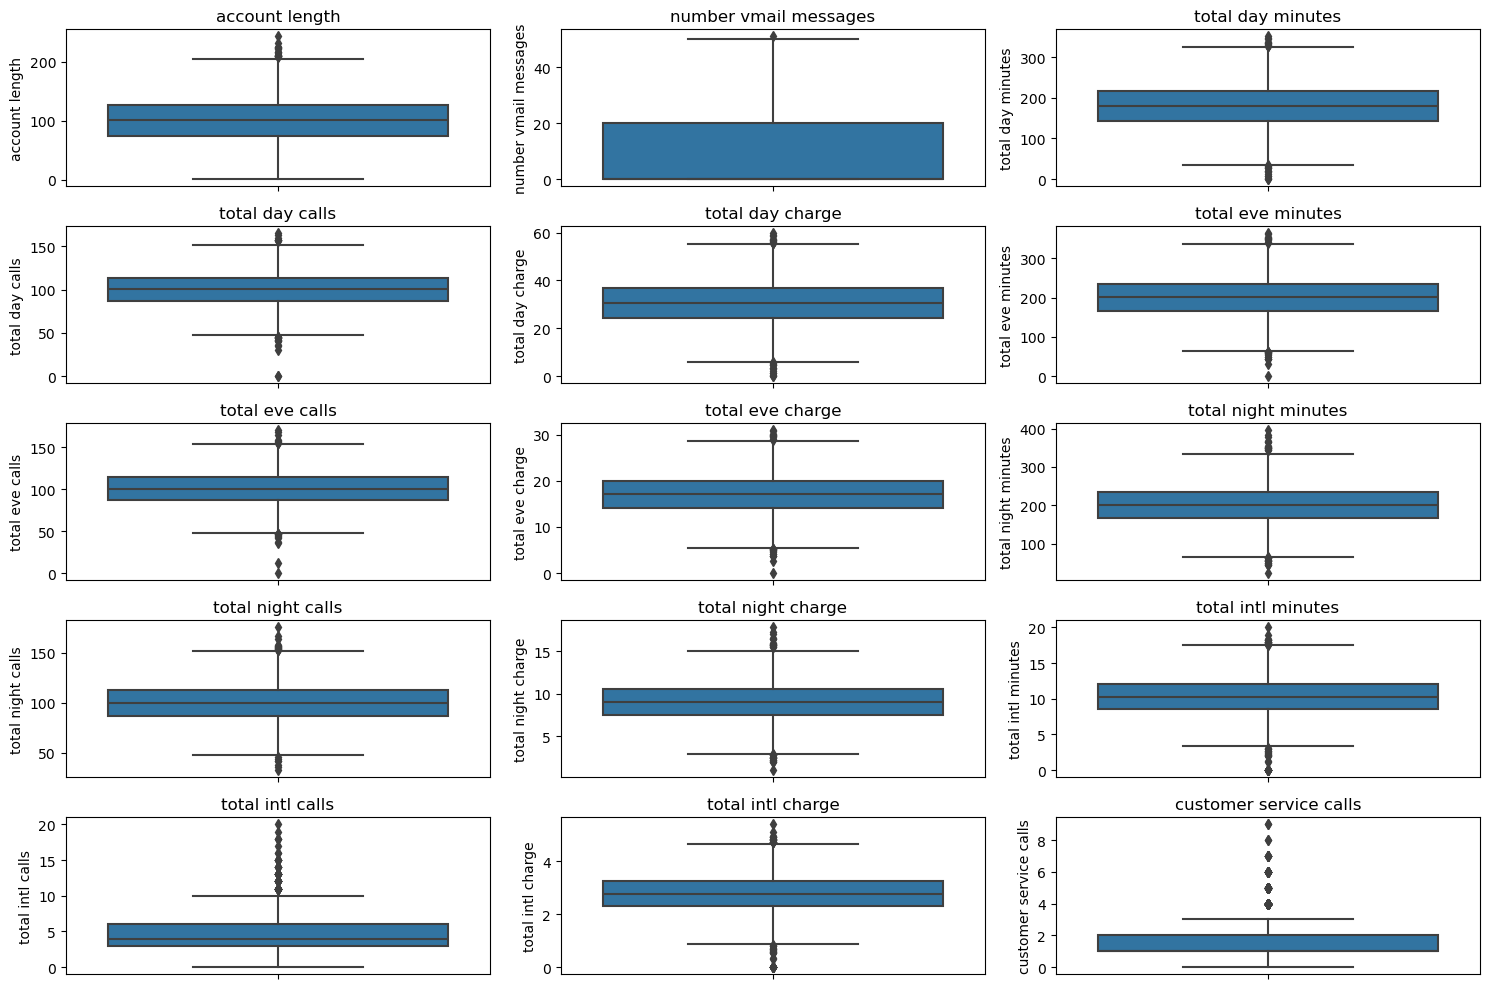

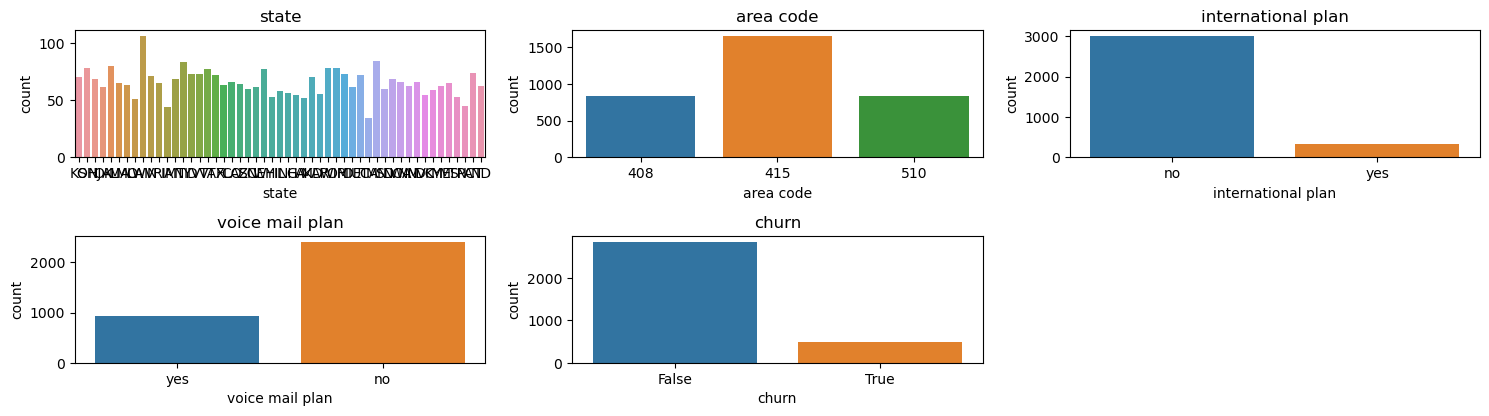

In [65]:
univariate_analysis.plot_boxplots(numerical_columns)

# Plotting bar plots for categorical columns
categorical_columns = ['state', 'area code', 'international plan', 'voice mail plan', 'churn']
univariate_analysis.plot_barplots(categorical_columns)